In [9]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

import io
from PIL import Image
import cv2

In [3]:
fbs1447_fits = fits.open('/home/stepan/Data/DFBS/fits_files/fbs1447_cor.fits')
fbs1447_fits.info()

Filename: /home/stepan/Data/DFBS/fits_files/fbs1447_cor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     105   (9601, 9602)   int16   


In [4]:
plate_img = fbs1447_fits[0].data
print('Type:', type(plate_img), ', shape:', plate_img.shape)

Type: <class 'numpy.ndarray'> , shape: (9602, 9601)


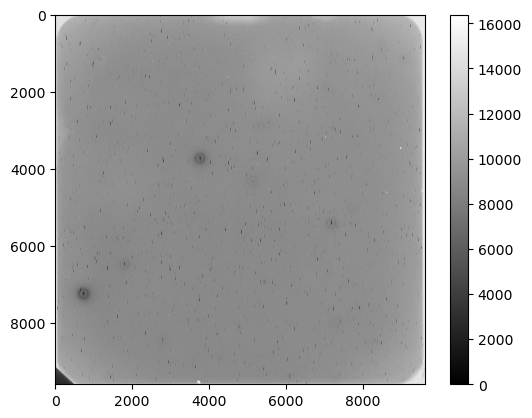

In [5]:
plt.imshow(plate_img, cmap='gray')
plt.colorbar()
plt.show()

In [19]:
scaled_img = ((plate_img - plate_img.min()) / (plate_img.max() - plate_img.min()) * 255).astype(np.uint8)

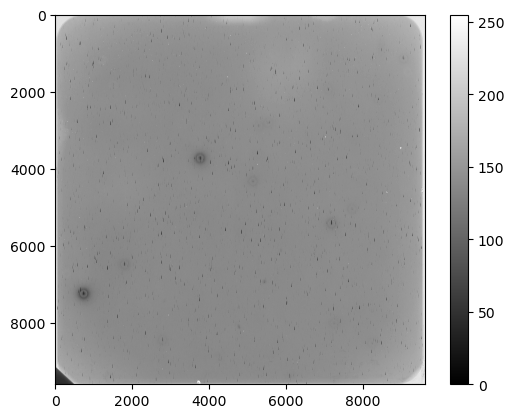

In [26]:
plt.imshow(scaled_img, cmap='gray')
plt.colorbar()
plt.savefig('results/Plate.png')
plt.show()

In [27]:
import cv2 as cv
from time import perf_counter

In [28]:
start_y = np.random.randint(9400)
start_x = np.random.randint(9400)

resized_img = cv.resize(plate_img, (2400, 2400))
scaled_img = ((plate_img/plate_img.max())*255).astype(np.uint8)
cropped_scaled_img = scaled_img[8200:8200+200,2300:2300+200]

In [29]:
t1 = perf_counter()
gblur = cv.GaussianBlur(cropped_scaled_img, (3, 3), 2, 2)
t2 = perf_counter()
mblur = cv.medianBlur(cropped_scaled_img, 3)
t3 = perf_counter()

g_th = cv.adaptiveThreshold(gblur, 255, cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY_INV,11,2)
t4 = perf_counter()
m_th = cv.adaptiveThreshold(mblur, 255, cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY_INV,11,2)
t5 = perf_counter()
# ret3, th3 = cv.threshold(gblur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# t6 = perf_counter()
# ret4, th4 = cv.threshold(mblur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# t7 = perf_counter()

In [30]:
print('Gaussian Blur:', t2 - t1)
print('Median Blur:', t3 - t2)
print('Adaptive Gaussian Thresholding Gaussian:', t4 - t3)
print('Adaptive Gaussian Thresholding Median:', t5 - t4)
# print("Otsu's Thresholding Gaussian:", t6 - t5)
# print("Otsu's Thresholding Median:", t7 - t6)

Gaussian Blur: 0.006709957999191829
Median Blur: 0.0018116900009772507
Adaptive Gaussian Thresholding Gaussian: 0.0028317880005488405
Adaptive Gaussian Thresholding Median: 8.873799924913328e-05


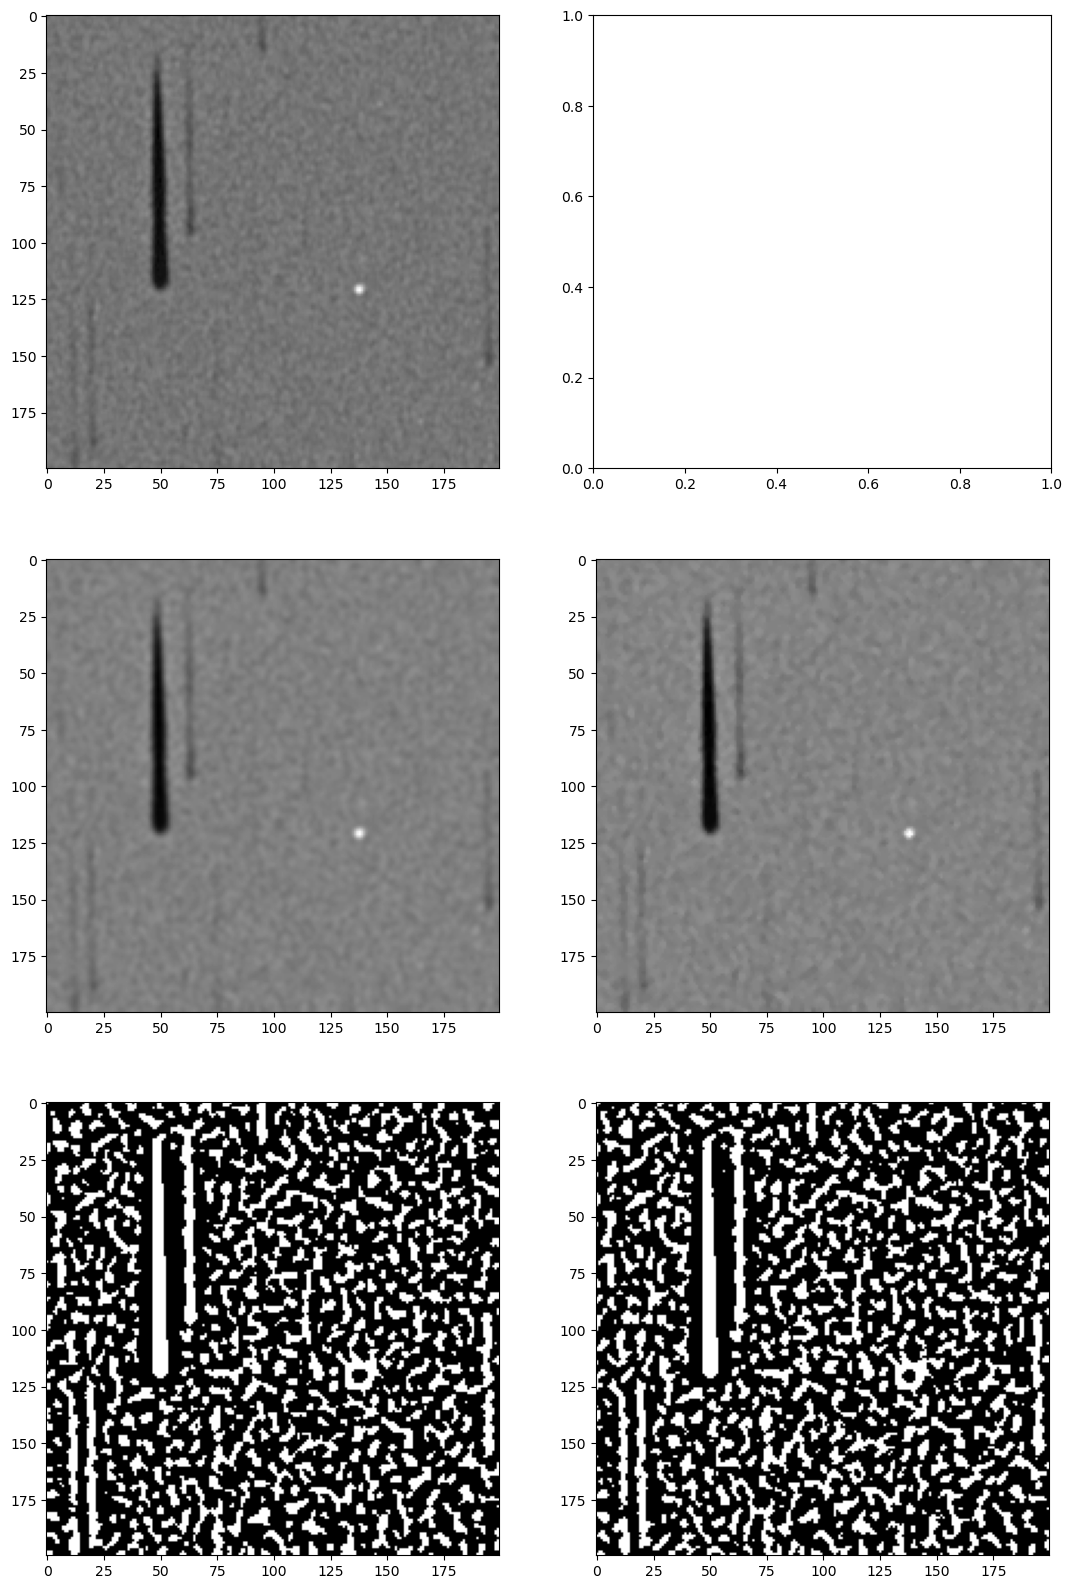

In [32]:
fig = plt.figure(figsize=(13, 20))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(321)  # top left side
ax2 = fig.add_subplot(322)  # top right side
ax3 = fig.add_subplot(323)  # mid left side
ax4 = fig.add_subplot(324)  # mid right side
ax5 = fig.add_subplot(325)  # bottom left side
ax6 = fig.add_subplot(326)  # bottom right side

ax1.imshow(cropped_scaled_img)
# ax2.imshow(mblur)
ax3.imshow(gblur)
ax4.imshow(mblur)
ax5.imshow(g_th)
ax6.imshow(m_th)

plt.show()

In [40]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')

from pavlidis import pavlidis

# from TPA.pavlidis.pavlidis.pavlidis import pavlidis

In [41]:
g_th[94,64]

255

In [42]:
pavl_res = pavlidis(m_th, 121, 51)

In [55]:
pavl_res[:, 0].min(), pavl_res[:, 0].max() + 1

(14, 122.0)

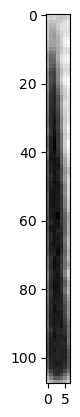

In [59]:
pavl_res[:,0].min(), pavl_res[:,0].max(), pavl_res[:,1].min(), pavl_res[:,1].max()

y_min, y_max = int(pavl_res[:, 0].min()), int(pavl_res[:, 0].max() + 1)
x_min, x_max = int(pavl_res[:, 1].min()), int(pavl_res[:, 1].max() + 1)

final_res = g_th[y_min: y_max, x_min: x_max]
final_res_img = cropped_scaled_img[y_min: y_max, x_min: x_max]
# g_th[14,96]

plt.imshow(final_res_img)

In [66]:
# plt.imshow(scaled_img, cmap='gray')
# plt.colorbar()
# plt.savefig('results/1_Plate.png')

# plt.imshow(cropped_scaled_img)
# plt.savefig('results/2_Plate_crop.png')

# plt.imshow(gblur)
# plt.savefig('results/3_Gaussian_Blurred.png')

# plt.imshow(g_th)
# plt.savefig('results/4_Thresholded.png')

# plt.show()

# plt.imshow(final_res_img)
# plt.colorbar()
# plt.savefig('results/5_Extracted.png')

In [291]:
def preprocess(img):
    start_y = np.random.randint(9400)
    start_x = np.random.randint(9400)
    start_y = 1700
    start_x = 8500
    
    print('(x, y):', start_x, start_y)

    scaled_img = ((img/img.max())*255).astype(np.uint8)
    cropped_scaled_img = scaled_img[start_y:start_y+200,start_x:start_x+200]

    t1 = perf_counter()
    gblur = cv.GaussianBlur(cropped_scaled_img, (3, 3), 2, 2)
    t2 = perf_counter()
    mblur = cv.medianBlur(cropped_scaled_img, 3)
    t3 = perf_counter()

    g_th = cv.adaptiveThreshold(gblur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv.THRESH_BINARY,11,2)
    t4 = perf_counter()
    m_th = cv.adaptiveThreshold(mblur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv.THRESH_BINARY,11,2)
    t5 = perf_counter()
    # ret3, th3 = cv.threshold(gblur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # t6 = perf_counter()
    # ret4, th4 = cv.threshold(mblur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # t7 = perf_counter()

    print('Gaussian Blur:', t2 - t1)
    print('Median Blur:', t3 - t2)
    print('Adaptive Gaussian Thresholding Gaussian:', t4 - t3)
    print('Adaptive Gaussian Thresholding Median:', t5 - t4)
    # print("Otsu's Thresholding Gaussian:", t6 - t5)
    # print("Otsu's Thresholding Median:", t7 - t6)

    fig = plt.figure(figsize=(25, 40))
    plt.gray()  # show the filtered result in grayscale
    ax1 = fig.add_subplot(321)  # top left side
    ax2 = fig.add_subplot(322)  # top right side
    ax3 = fig.add_subplot(323)  # mid left side
    ax4 = fig.add_subplot(324)  # mid right side
    ax5 = fig.add_subplot(325)  # bottom left side
    ax6 = fig.add_subplot(326)  # bottom right side

    ax1.imshow(cropped_scaled_img)
    # ax2.imshow(mblur)
    ax3.imshow(gblur)
    ax4.imshow(mblur)
    ax5.imshow(g_th)
    ax6.imshow(m_th)
    plt.show()
    return

(x, y): 8500 1700
Gaussian Blur: 0.00019780000002356246
Median Blur: 8.669999806443229e-05
Adaptive Gaussian Thresholding Gaussian: 0.00027240000054007396
Adaptive Gaussian Thresholding Median: 0.00021559999731834978


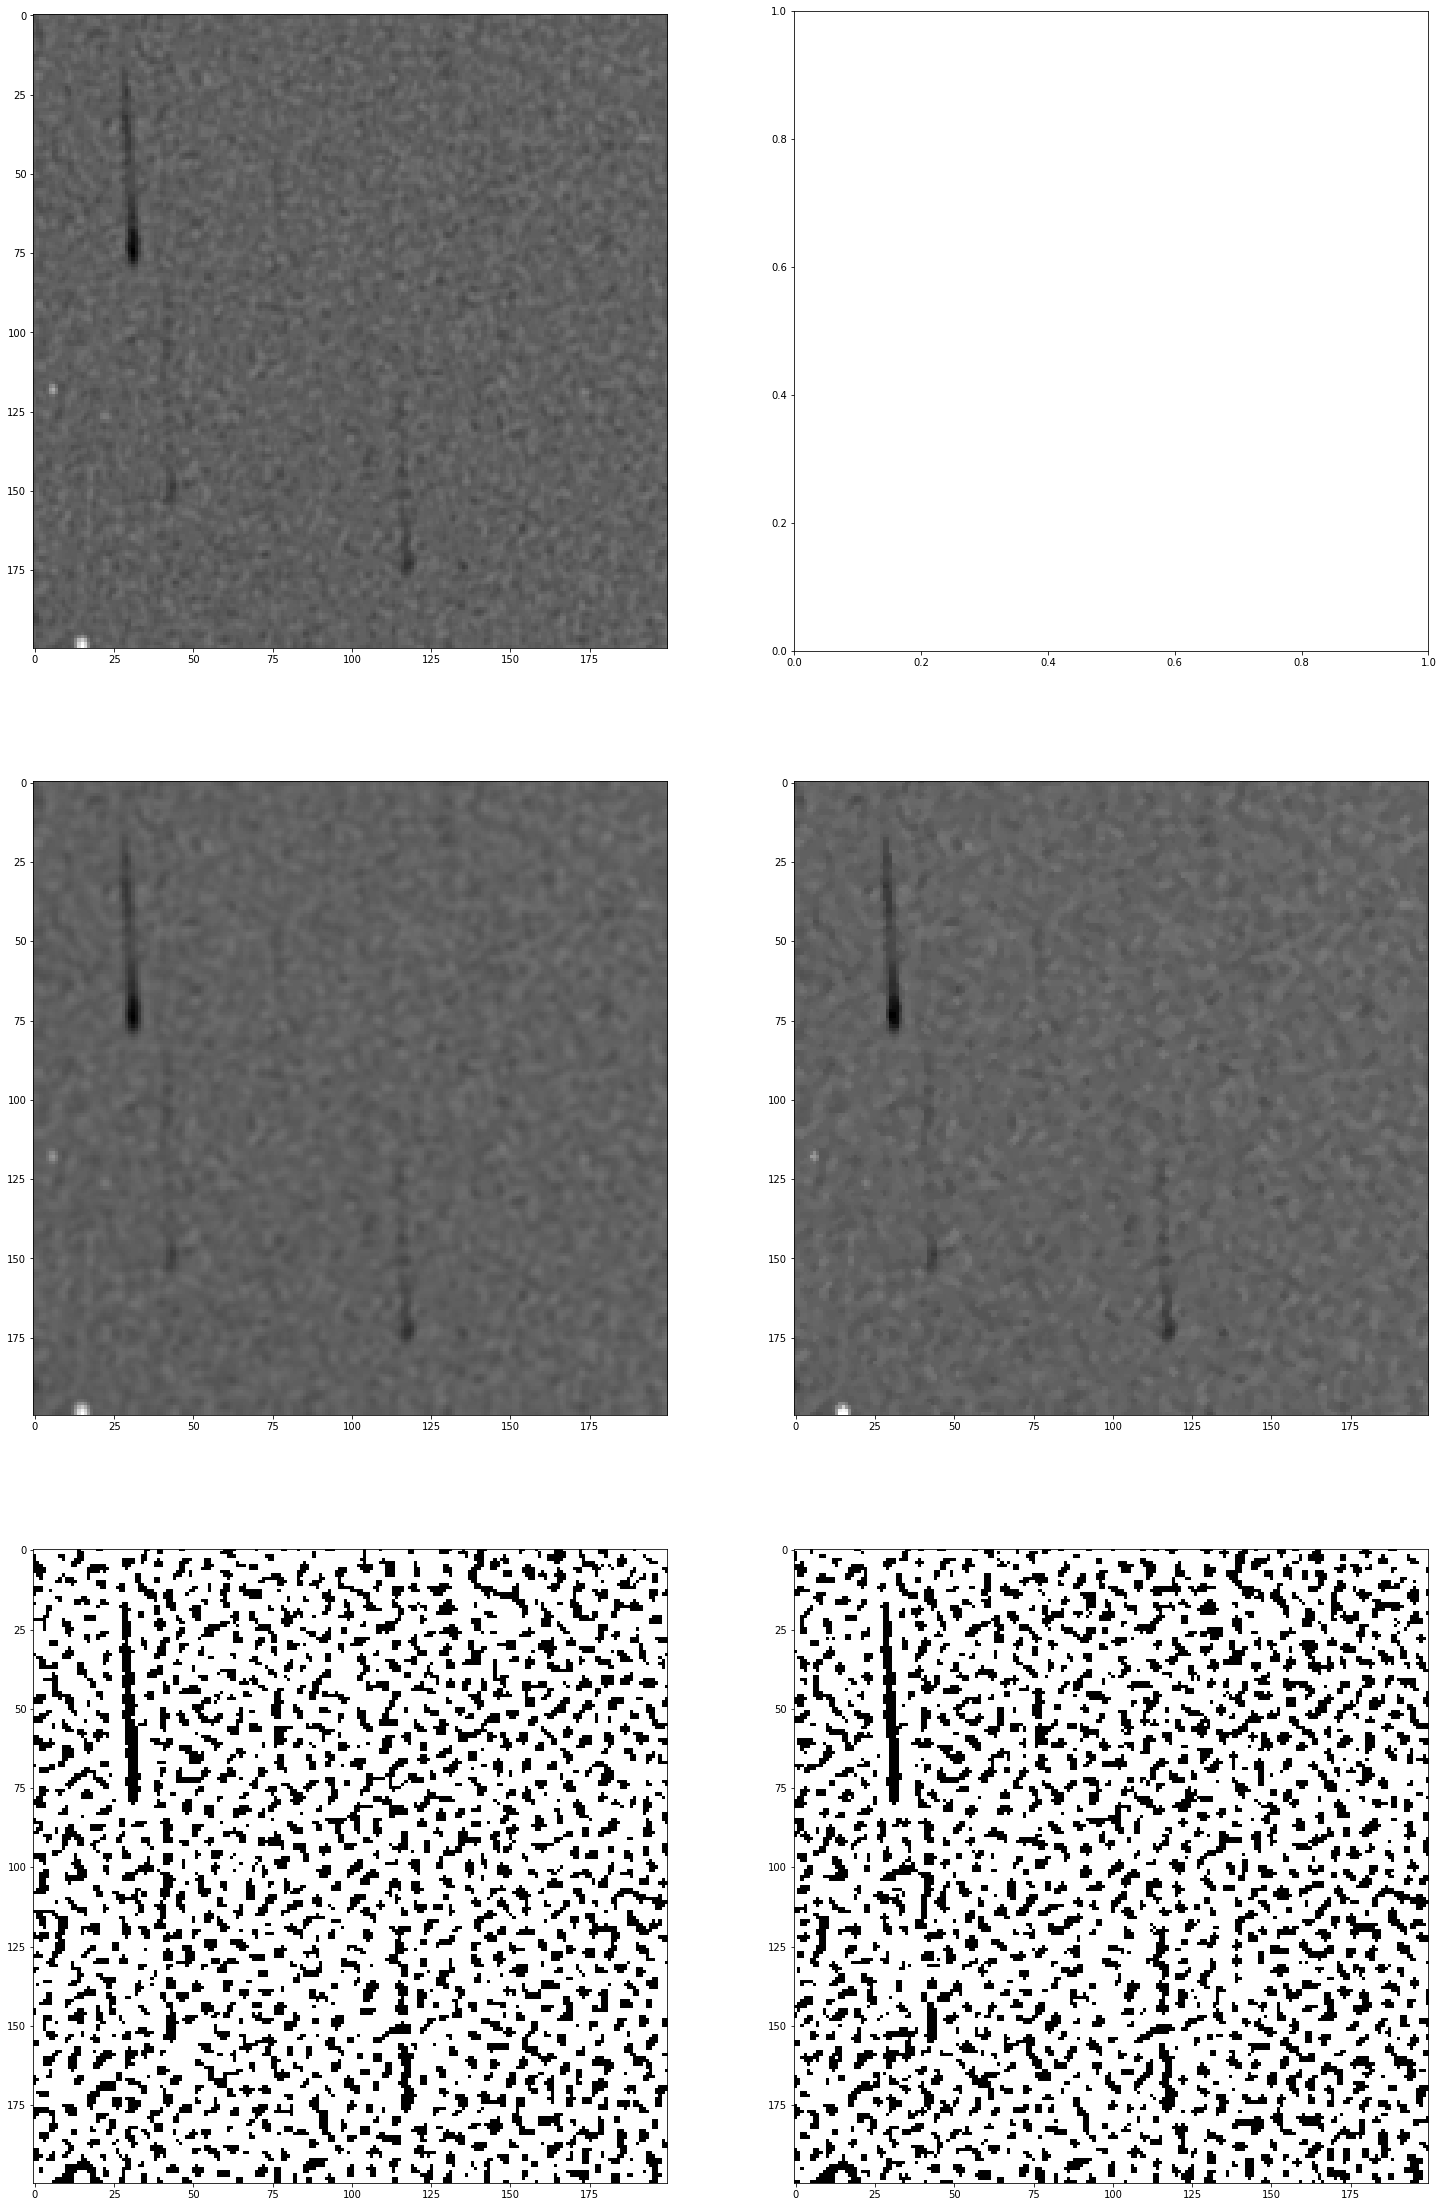

In [292]:
preprocess(plate_img)

In [158]:
list((mblur - gblur))

[array([255,   0,   0,   0,   1, 254, 253, 255, 254,   1,   1,   0,   2,
          1,   2,   2,   1,   0, 255,   0, 255,   0,   0, 255, 255,   0,
          0, 255,   0,   0,   1,   2,   2,   0, 255, 255, 255, 255,   1,
          0,   1,   1,   1,   2,   4,   4,   1,   0,   0,   0,   0,   0,
          1, 255, 255,   0,   0,   1,   1,   1,   0, 255,   2,   2,   2,
          2,   0,   2,   1,   3,   2,   2,   2, 255, 255, 254,   0, 254,
        255, 255,   0, 254, 255,   1,   1,   1, 255, 255, 255, 255,   0,
          0,   1,   0,   0,   1,   3,   3,   1,   0,   0,   0,   0,   0,
        255, 255, 255, 255,   1, 255, 254, 254, 255,   0,   1,   1,   0,
          1,   1,   0,   1,   0, 255, 255, 254, 253, 254, 255, 254, 255,
          1,   3,   3,   2,   0,   0,   1,   2,   0,   1,   1,   1,   0,
          0, 254, 254, 254, 254, 254, 255, 253, 254, 255,   1,   1,   0,
        254, 255, 255, 252, 253,   0,   1,   0,   0,   1,   0,   0, 255,
        255,   1,   2,   1, 254, 254, 252, 253, 253

In [89]:
plate_img/255, plate_img.astype("uint8")

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [57.14117647, 57.36862745, 56.10196078, ..., 57.80392157,
         59.05098039, 59.59607843],
        [57.6       , 57.78823529, 56.38823529, ..., 57.65882353,
         57.68627451, 58.31764706],
        ...,
        [13.38039216,  7.09411765, 11.64313725, ..., 59.91372549,
         59.00392157, 58.36862745],
        [13.35294118,  9.71764706, 14.17254902, ..., 59.81176471,
         59.07058824, 58.49411765],
        [14.41176471,  9.06666667, 13.69019608, ..., 59.69019608,
         59.19607843, 58.89411765]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [235,  37, 226, ..., 148, 210,  93],
        [ 96, 144,  43, ..., 111, 118,  23],
        ...,
        [ 84,  17, 153, ..., 174, 198,  36],
        [ 77, 174,  30, ..., 148, 215,  68],
        [ 91,   8, 163, ..., 117, 247, 170]], dtype=uint8))

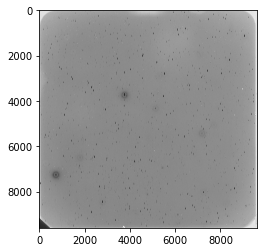

In [94]:
plt.imshow((plate_img/255).astype(np.uint8))

In [5]:
fbs1447_fits['PRIMARY'].header

SIMPLE  =                    T                                                  
BITPIX  =                   16 / Array data type                                
NAXIS   =                    2                                                  
NAXIS1  =                 9601                                                  
NAXIS2  =                 9602                                                  
EXTEND  =                    T                                                  
        -------------------- Original data of observation                       
DATEORIG= '1976-01-08'         / Original recorded date of the observation      
TMS-ORIG= 'UT 23:59'           / Start of the observation (logs)                
TIMEFLAG= 'missing '           / Quality flag of the recorded observation time  
RA-ORIG = '12:31:13.920'       / RA of plate center as given in source          
DEC-ORIG= '-9:07:57.00'        / Dec of plate center as given in source         
OBJECT  = 'FBS 1447'        

In [6]:
fbs1447_fits_hdr = fits.open('data/fbs1447_cor.fits.hdr')
fbs1447_fits_hdr.info()

Filename: data/fbs1447_cor.fits.hdr
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     102   ()      


In [14]:
fbs1447_fits[0].__dir__()

['_header_str',
 '_file',
 '_buffer',
 '_header_offset',
 '_data_offset',
 '_data_size',
 '_data_replaced',
 '_data_needs_rescale',
 '_new',
 '_output_checksum',
 '_checksum',
 '_checksum_valid',
 '_datasum',
 '_datasum_valid',
 '_do_not_scale_image_data',
 '_uint',
 '_scale_back',
 '_bzero',
 '_bscale',
 '_axes',
 '_bitpix',
 '_gcount',
 '_pcount',
 '_blank',
 '_orig_bitpix',
 '_orig_blank',
 '_orig_bzero',
 '_orig_bscale',
 '_modified',
 '_header',
 'data',
 '__module__',
 '__doc__',
 '_default_name',
 '__init__',
 'match_header',
 'update_header',
 '_verify',
 'standard_keyword_comments',
 'is_image',
 'section',
 'shape',
 'header',
 '_update_header_scale_info',
 'scale',
 '_scale_internal',
 '_verify_blank',
 '_prewriteto',
 '_writedata_internal',
 '_writeinternal_dask',
 '_dtype_for_bitpix',
 '_convert_pseudo_integer',
 '_get_scaled_image_data',
 '_summary',
 '_calculate_datasum',
 'size',
 'filebytes',
 'fileinfo',
 'copy',
 'req_cards',
 'add_datasum',
 'add_checksum',
 'verify